In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

C:\Users\shrav\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


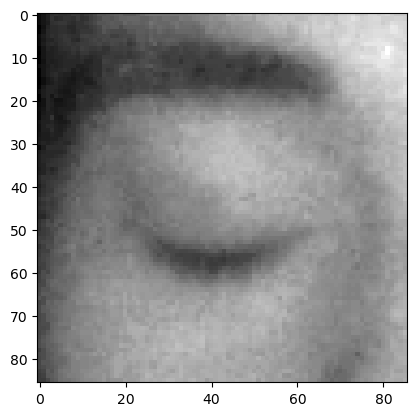

In [2]:
img_array = cv2.imread("data/test/sleepy/s0001_00001_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")

In [3]:
img_array.shape

(86, 86)

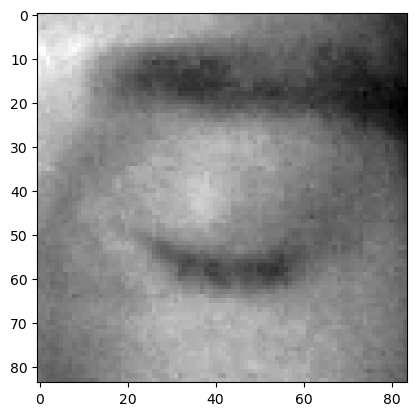

In [4]:
Datadirectory = "data/train/" 
Classes = ["sleepy", "awake"]  

for category in Classes:
    path = os.path.join(Datadirectory, category)  
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    


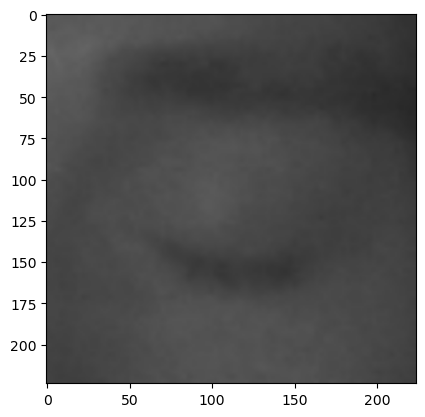

In [5]:
img_size=224

new_array = cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [6]:
training_Data = []  

def create_training_data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        count = 0  # To limit to 900 images
        for img in os.listdir(path):
            if count >= 900:
                break
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
                count += 1
            except Exception as e:
                pass


In [7]:
create_training_data()

In [8]:
print(len(training_Data))

1800


In [9]:
import random
random.shuffle(training_Data)

In [10]:
x = []
y = []

for features,label in training_Data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1,img_size,img_size,3)

In [11]:
x.shape

(1800, 224, 224, 3)

In [12]:
x = x/255.0; #normalization

In [13]:
y = np.array(y)

In [14]:
import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [15]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
#deep learning model for training - Transfer learning


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

In [19]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [20]:
base_input = model.input

In [21]:
base_output =  model.layers[-4].output

In [22]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # one node (either 1 or 0)
final_output = layers.Activation('sigmoid')(final_output)

In [23]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [25]:
#settings for binary classification

In [26]:
new_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
new_model.fit(x, y, epochs=1, validation_split=0.1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8982 - loss: 0.2926 - val_accuracy: 0.6444 - val_loss: 2.0348


In [28]:
new_model.save('mt_model.h5')

In [29]:
# Step 1: Compile the model
new_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Step 2: Train the model
new_model.fit(x, y, epochs=5, validation_split=0.1) 

# Step 3: Save the trained model
new_model.save('my_model_drowsiness.h5')  

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.9530 - loss: 0.1650 - val_accuracy: 0.7389 - val_loss: 0.4965
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9662 - loss: 0.0692 - val_accuracy: 0.8611 - val_loss: 0.2919
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9840 - loss: 0.0395 - val_accuracy: 0.9333 - val_loss: 0.1703
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9850 - loss: 0.0390 - val_accuracy: 0.9611 - val_loss: 0.1045
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9954 - loss: 0.0172 - val_accuracy: 0.9167 - val_loss: 0.5377


In [30]:
new_model = tf.keras.models.load_model('my_model_drowsiness.h5')

In [31]:
img_array = cv2.imread('data/train/sleepy/s0001_00005_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb,(img_size,img_size))

In [32]:
x_input = np.array(new_array).reshape(1, img_size,img_size,3)

In [33]:
x_input.shape

(1, 224, 224, 3)

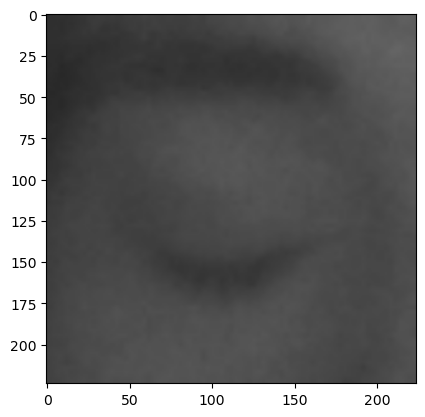

In [34]:
plt.imshow(new_array)

In [35]:
x_input = x_input/255.0

In [36]:
prediction = new_model.predict(x_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step


In [37]:
prediction

array([[7.9908943e-07]], dtype=float32)

In [38]:
#check on unknown images

In [39]:
img = cv2.imread('sad_women.jpg')

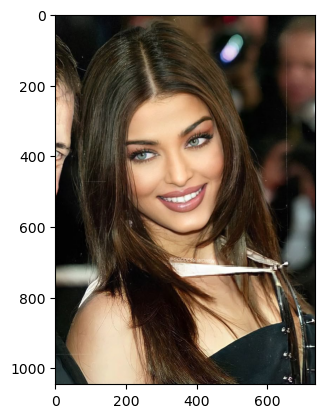

In [40]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [41]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [42]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [43]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [44]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [45]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

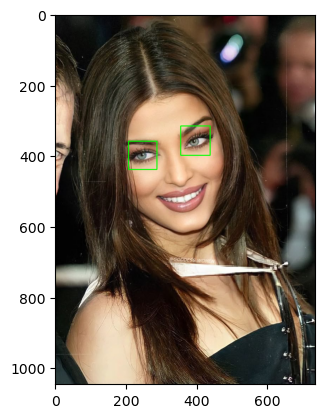

In [46]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [47]:
#cropping eye image

In [48]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

for x, y, w, h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]


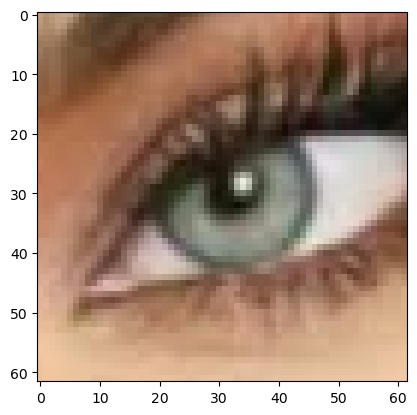

In [49]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [50]:
eyes_roi.shape

(62, 62, 3)

In [51]:
final_image = cv2.resize(eyes_roi,(224,224))
final_image = np.expand_dims(final_image,axis=0)
final_image = final_image/255.0

In [52]:
final_image.shape

(1, 224, 224, 3)

In [53]:
new_model.predict(final_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0.9999948]], dtype=float32)

In [54]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.


In [56]:
pip install tf-keras

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install beepy

Note: you may need to restart the kernel to use updated packages.


In [58]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
import numpy as np
import time
import platform
import logging
import pygame  # For cross-platform audio playback
from tensorflow.keras.models import load_model

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load model
try:
    new_model = load_model("my_model_drowsiness.h5")
    logging.info("Model loaded successfully")
except Exception as e:
    logging.error(f"Error loading model: {e}")
    raise

# Load Haar cascades
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
if faceCascade.empty() or eye_cascade.empty():
    raise IOError("Failed to load Haar cascade files")

# Initialize webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

# Initialize pygame mixer for audio
pygame.mixer.init()
try:
    alert_sound = pygame.mixer.Sound("alert.wav")  # Replace with path to your .wav file
    logging.info("Alert sound loaded successfully")
except Exception as e:
    logging.error(f"Failed to load alert sound: {e}")
    alert_sound = None

# Drowsiness detection variables
closed_eyes_start_time = None
alert_duration = 2  # Seconds to trigger alert
alert_triggered = False
last_beep_time = 0  # To control beep interval
beep_interval = 1  # Seconds between beeps
alert_flash = False  # For flashing the alert text
flash_interval = 0.5  # Seconds between flashes
last_flash_time = 0  # To control flashing speed
last_status_change_time = time.time()  # Track when status last changed
beep_duration = 3  # Seconds to beep continuously when uncertain or eyes closed

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            logging.error("Failed to capture frame")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        status = "Eyes Not Detected"

        # Detect faces
        faces = faceCascade.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Draw face rectangle
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]

            # Restrict eye detection to the upper half of the face to avoid nostrils
            eye_search_area = roi_gray[0:int(h/2), 0:w]
            eye_search_color = roi_color[0:int(h/2), 0:w]
            eyes = eye_cascade.detectMultiScale(eye_search_area, 1.1, 4)

            # Process detected eyes
            closed_count = 0
            eye_predictions = []
            for (ex, ey, ew, eh) in eyes:
                # Ensure eyes are roughly at the same vertical level (to filter out false positives like nostrils)
                if len(eyes) > 1:
                    eye_levels = [ey for (ex, ey, ew, eh) in eyes]
                    if max(eye_levels) - min(eye_levels) > 20:  # If vertical difference is too large, skip
                        continue

                cv2.rectangle(eye_search_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
                eye_roi = eye_search_color[ey:ey+eh, ex:ex+ew]
                if eye_roi.size > 0:
                    try:
                        final_image = cv2.resize(eye_roi, (224, 224))
                        final_image = np.expand_dims(final_image, axis=0)
                        final_image = final_image / 255.0
                        prediction = new_model.predict(final_image)
                        confidence = prediction[0][0]
                        # Use a stricter threshold for classification
                        if confidence > 0.7:
                            eye_status = "Eyes Open"
                        elif confidence < 0.3:
                            eye_status = "Eyes Closed"
                            closed_count += 1
                        else:
                            eye_status = "Uncertain"
                        eye_predictions.append(eye_status)
                    except Exception as e:
                        logging.error(f"Prediction error: {e}")
                        eye_predictions.append("Prediction Error")

            # Aggregate eye predictions
            if len(eye_predictions) > 0:
                if closed_count == len(eyes) and len(eyes) >= 1:  # All detected eyes are closed
                    status = "Eyes Closed"
                elif "Eyes Open" in eye_predictions:
                    status = "Eyes Open"
                else:
                    status = "Uncertain"

        # Check if the status has been in 'Eyes Closed', 'Uncertain', or 'Eyes Not Detected' for more than 3 seconds
        if status in ["Eyes Closed", "Uncertain", "Eyes Not Detected"]:
            if time.time() - last_status_change_time >= beep_duration:
                if alert_sound:
                    try:
                        alert_sound.play(maxtime=0)  # Play continuously until status changes
                        logging.info("Continuous beep triggered")
                    except Exception as e:
                        logging.error(f"Alert sound failed: {e}")
        else:
            last_status_change_time = time.time()  # Reset timer when eyes are open
            if alert_sound:
                try:
                    alert_sound.stop()  # Stop continuous beep once eyes are open
                    logging.info("Beep stopped")
                except Exception as e:
                    logging.error(f"Alert sound failed to stop: {e}")

        # Display status
        cv2.putText(frame, status, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 2)
        cv2.imshow('Drowsiness Detection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()
    pygame.mixer.quit()


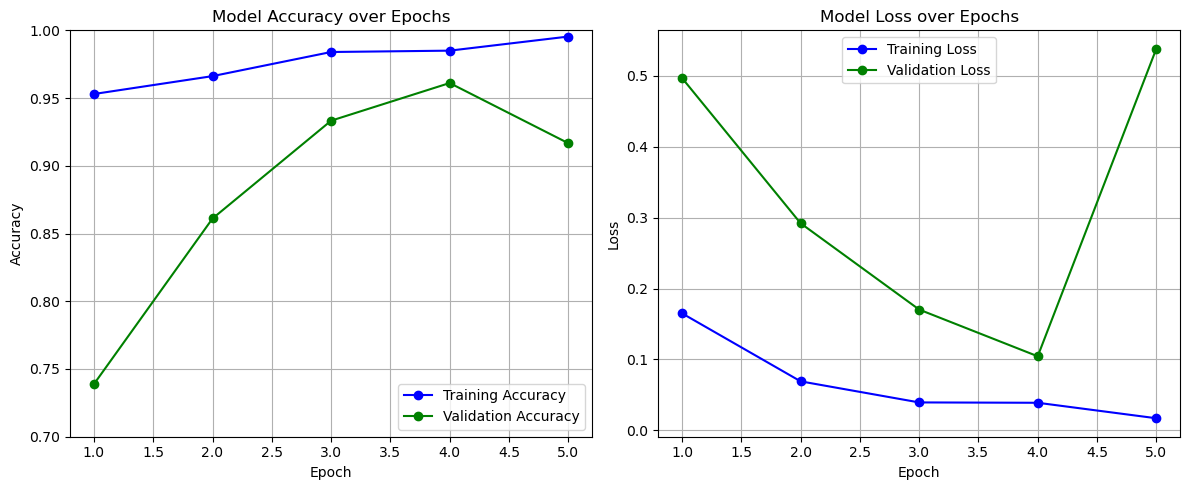

In [1]:
import matplotlib.pyplot as plt

# Epoch numbers
epochs = [1, 2, 3, 4, 5]

# Training metrics
train_accuracy = [0.9530, 0.9662, 0.9840, 0.9850, 0.9954]
train_loss = [0.1650, 0.0692, 0.0395, 0.0390, 0.0172]

# Validation metrics
val_accuracy = [0.7389, 0.8611, 0.9333, 0.9611, 0.9167]
val_loss = [0.4965, 0.2919, 0.1703, 0.1045, 0.5377]

# Plotting
plt.figure(figsize=(12, 5))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'go-', label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.legend()
plt.grid(True)

# Loss subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'go-', label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
